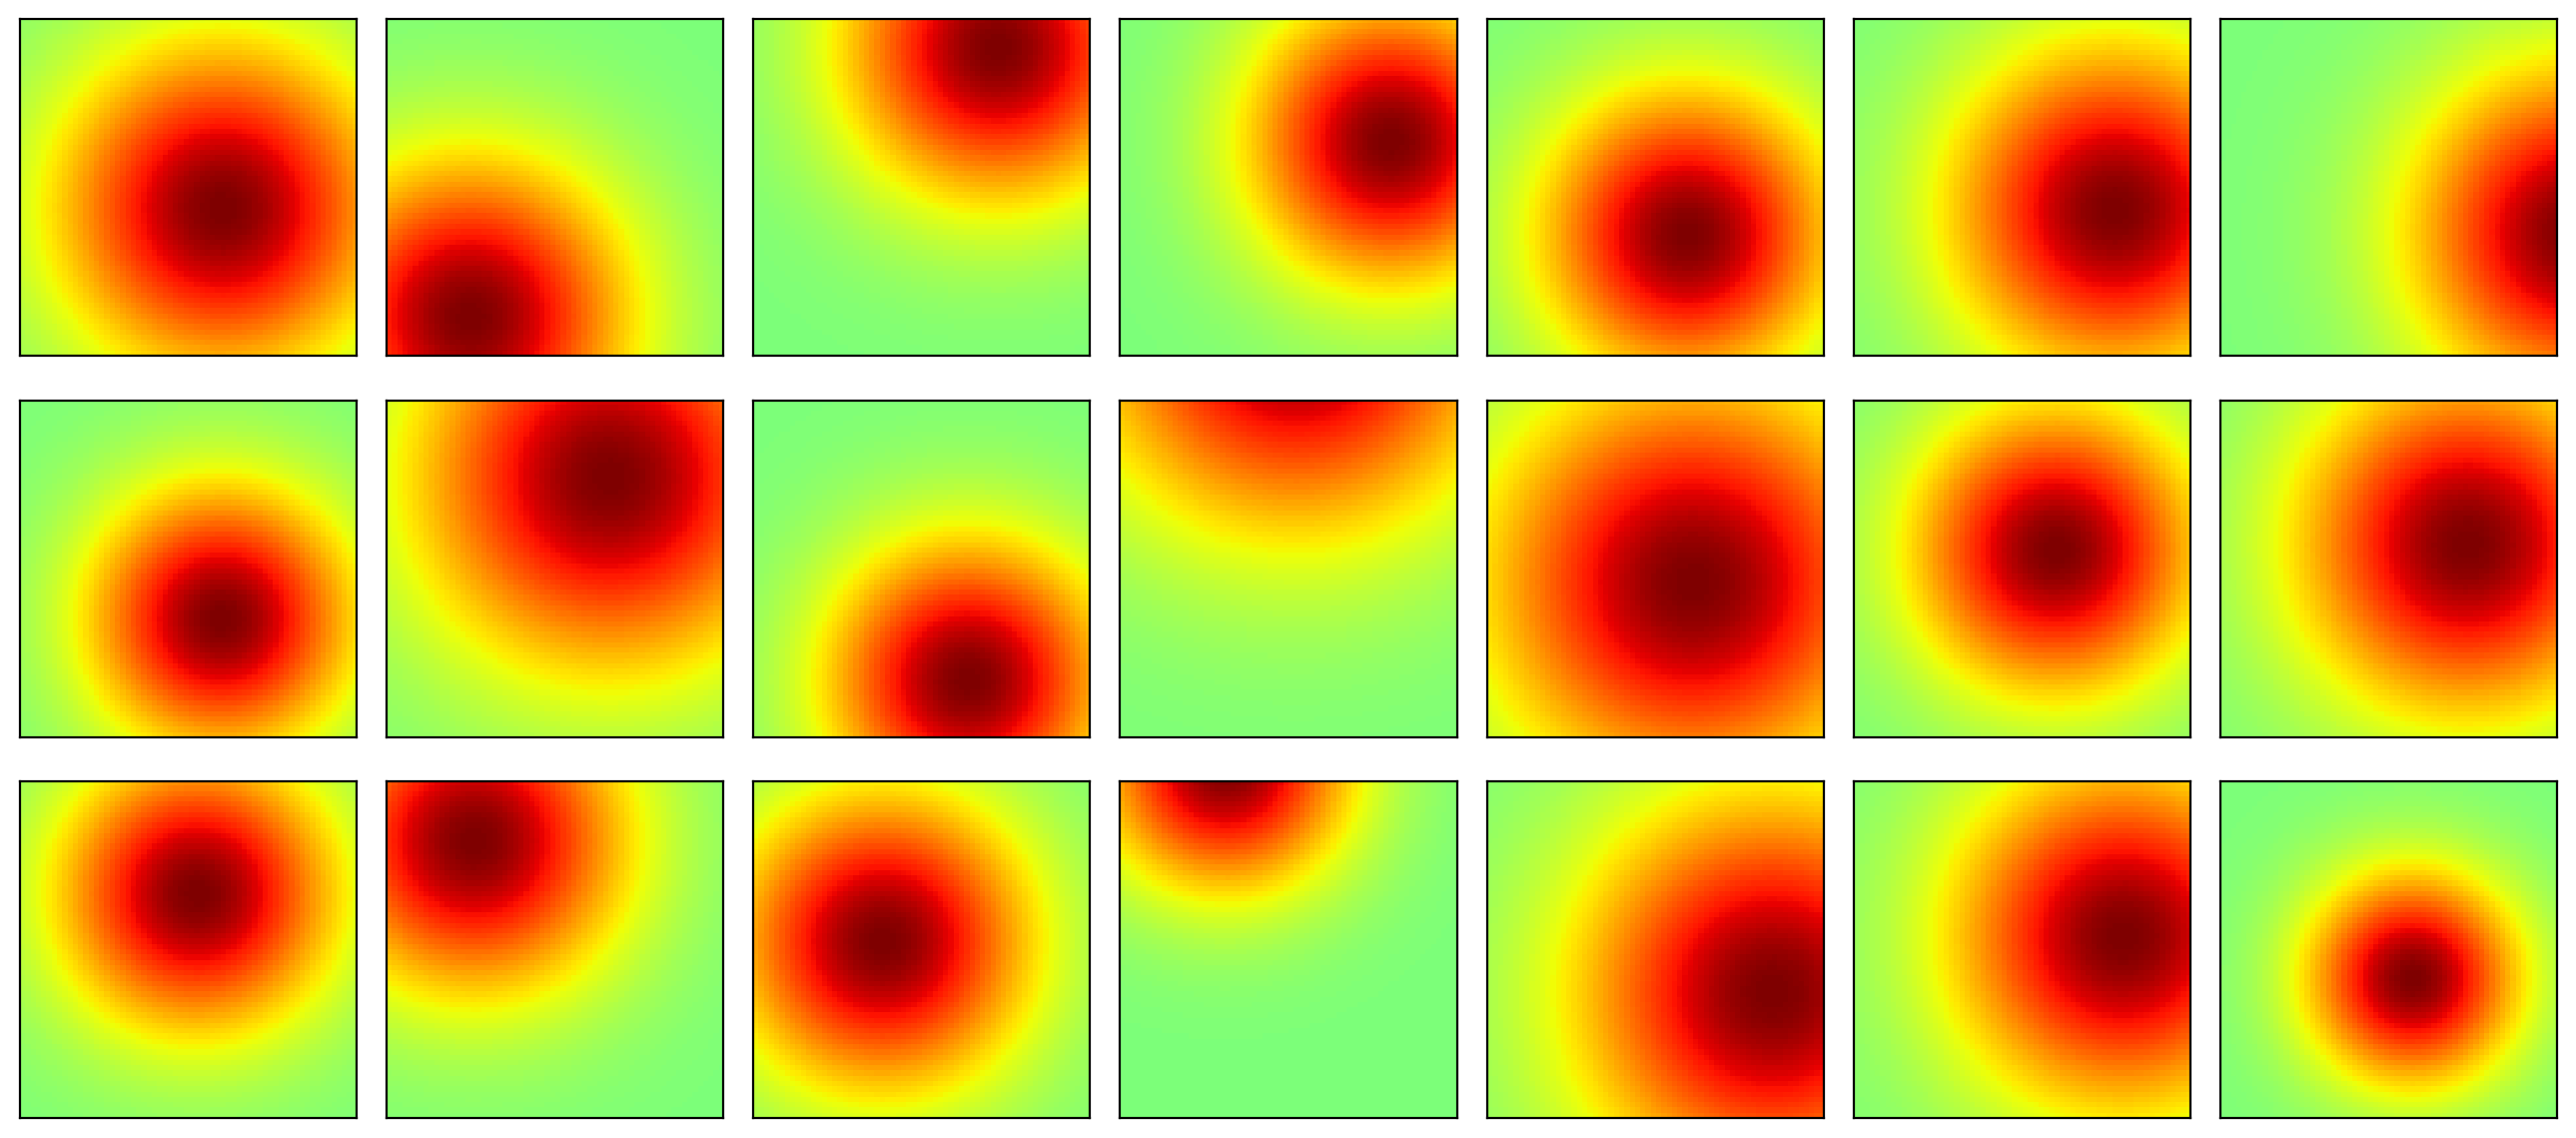

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

import time


#%% VARAIBLES
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

N_GAUSS = 3000
IMG_SIZE = 64

LR = 2e-4
NUM_EPOCHS = 1500
BATCH_SIZE = 86


#%% DATA
def create_data(noise_factor=1/5):
    x = np.linspace(-4, 4, IMG_SIZE)
    X,Y = np.meshgrid(x, x)

    images = torch.zeros(N_GAUSS, 1, IMG_SIZE, IMG_SIZE)


    for i in range(N_GAUSS):
        width = np.random.rand() / 0.6 + 1.8
        loc = 2*np.random.randn(2)

        G = np.exp(-1 * ((X - loc[0])**2 + (Y + loc[1])**2) / (2*width**2))
        G += np.random.randn(IMG_SIZE, IMG_SIZE) * noise_factor

        images[i,:,:,:] = torch.Tensor(G).view(1, IMG_SIZE, IMG_SIZE)


    return images

images = create_data(noise_factor=0)



#%% Visualize
fig, axs = plt.subplots(3, 7, figsize=(13, 6), dpi=200, tight_layout=True)
for i, ax in enumerate(axs.flatten()):
    rdm_idx = np.random.randint(N_GAUSS)
    G = np.squeeze(images[rdm_idx])
    ax.imshow(G, vmin=-1, vmax=1, extent=[-4,4,-4,4], cmap='jet')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

Example discriminator output:  torch.Size([10, 1])
Example generator output:  torch.Size([10, 1, 64, 64])


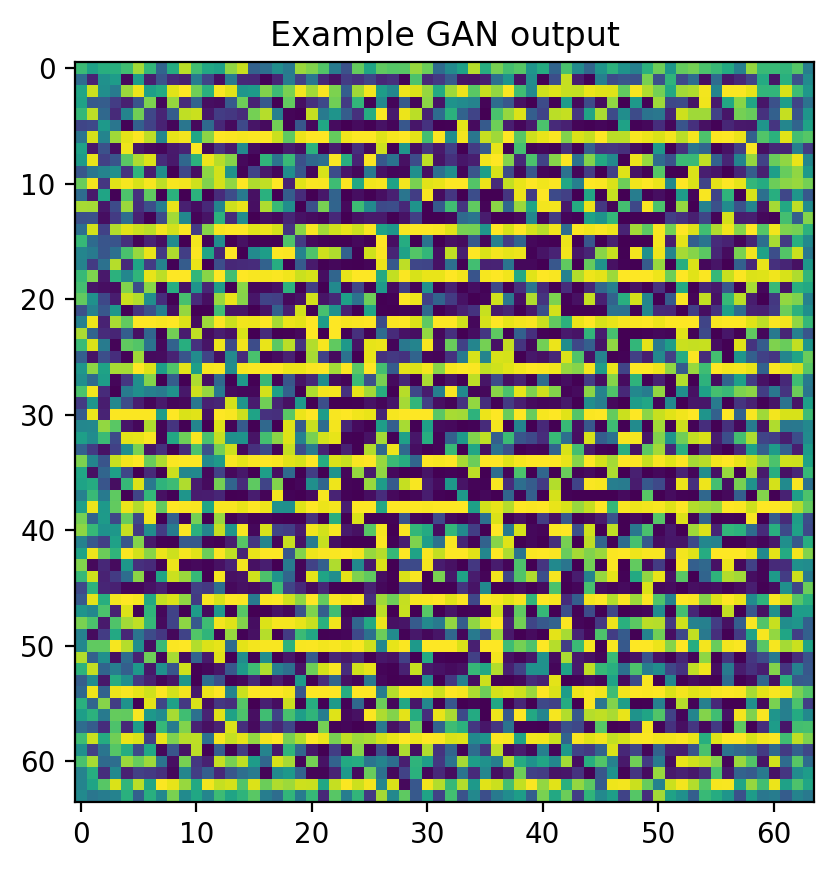

In [ ]:
#%% GAN MODEL
class discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 64, 4, 2, 1, bias=False)
        self.conv2 = nn.Conv2d(64, 128, 4, 2, 1, bias=False)
        self.conv3 = nn.Conv2d(128, 256, 4, 2, 1, bias=False)
        self.conv4 = nn.Conv2d(256, 512, 4, 2, 1, bias=False)
        self.conv5 = nn.Conv2d(512, 1, 4, 2, 0, bias=False)

        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = F.leaky_relu(self.conv2(x), 0.2)
        x = self.bn2(x)

        x = F.leaky_relu(self.conv3(x), 0.2)
        x = self.bn3(x)

        x = F.leaky_relu(self.conv4(x), 0.2)
        x = self.bn4(x)

        return self.conv5(x).view(-1, 1)


class generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False)
        self.conv2 = nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False)
        self.conv3 = nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False)
        self.conv4 = nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False)
        self.conv5 = nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False)

        self.bn1 = nn.BatchNorm2d(512)
        self.bn2 = nn.BatchNorm2d(256)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        return torch.tanh(self.conv5(x))


dnet = discriminator()
y = dnet(torch.randn(10, 1, 64, 64))
print("Example discriminator output: ", y.shape)

gnet = generator()
y = gnet(torch.randn(10, 100, 1, 1))
print("Example generator output: ", y.shape)
plt.figure(dpi=200)
plt.imshow(y[0].squeeze().detach().numpy())
plt.title("Example GAN output")
plt.show()

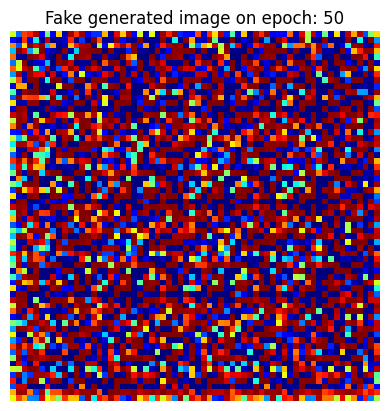


 time: 9.02 | epoch:    50/1500 | d_loss: 0.001 | g_loss: 8.739 | d_real: 100.00% | d_fake: 0.00% 



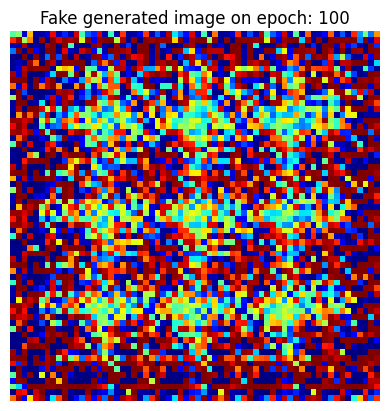


 time: 18.01 | epoch:   100/1500 | d_loss: 0.009 | g_loss: 7.869 | d_real: 100.00% | d_fake: 0.00% 



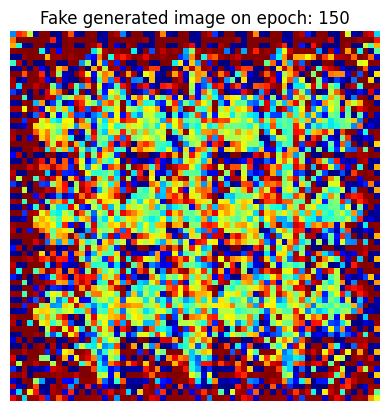


 time: 27.19 | epoch:   150/1500 | d_loss: 0.002 | g_loss: 9.491 | d_real: 100.00% | d_fake: 0.00% 



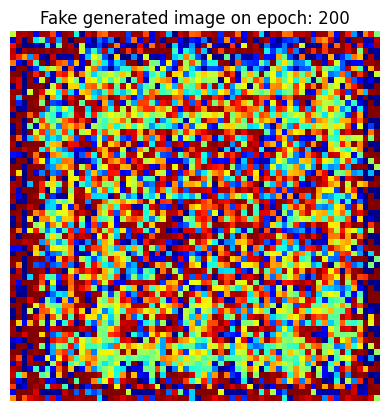


 time: 36.35 | epoch:   200/1500 | d_loss: 0.003 | g_loss: 7.101 | d_real: 100.00% | d_fake: 0.00% 



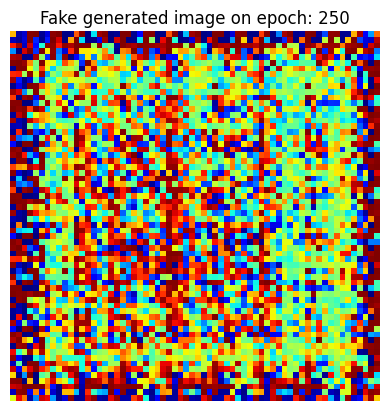


 time: 45.51 | epoch:   250/1500 | d_loss: 0.002 | g_loss: 7.320 | d_real: 100.00% | d_fake: 0.00% 



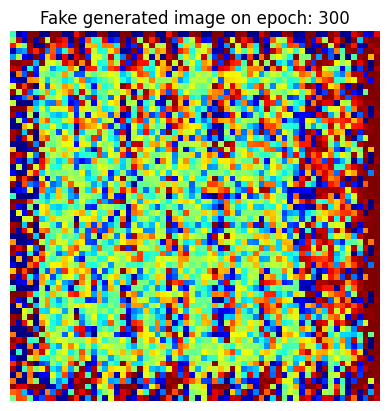


 time: 54.49 | epoch:   300/1500 | d_loss: 0.001 | g_loss: 8.184 | d_real: 100.00% | d_fake: 0.00% 



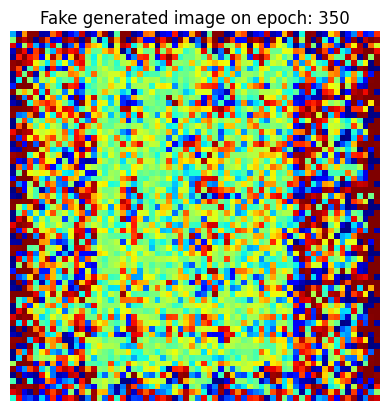


 time: 63.47 | epoch:   350/1500 | d_loss: 0.002 | g_loss: 7.035 | d_real: 100.00% | d_fake: 0.00% 



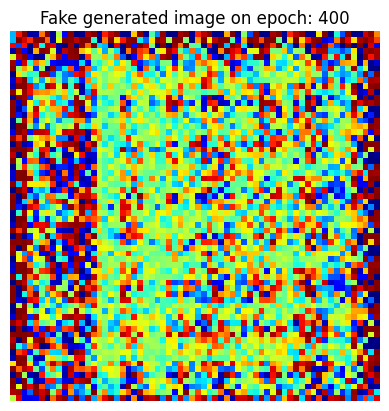


 time: 72.49 | epoch:   400/1500 | d_loss: 0.001 | g_loss: 7.195 | d_real: 100.00% | d_fake: 0.00% 



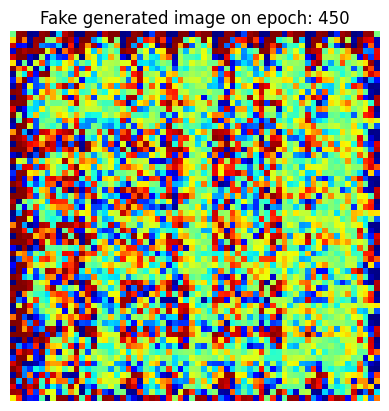


 time: 81.37 | epoch:   450/1500 | d_loss: 0.001 | g_loss: 8.008 | d_real: 100.00% | d_fake: 0.00% 



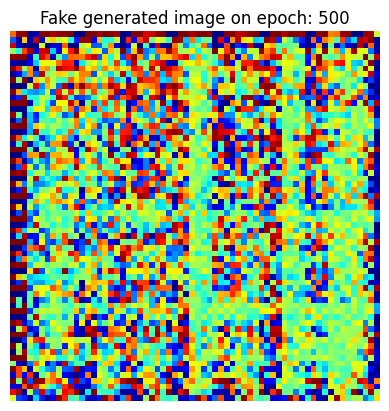


 time: 90.25 | epoch:   500/1500 | d_loss: 0.001 | g_loss: 7.287 | d_real: 100.00% | d_fake: 0.00% 



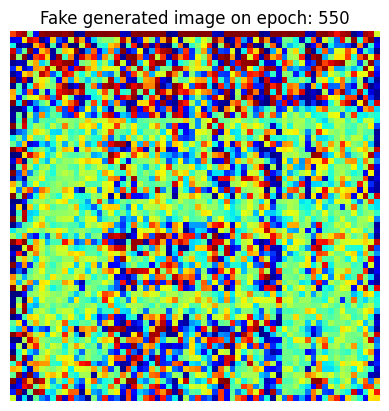


 time: 99.22 | epoch:   550/1500 | d_loss: 0.000 | g_loss: 8.005 | d_real: 100.00% | d_fake: 0.00% 



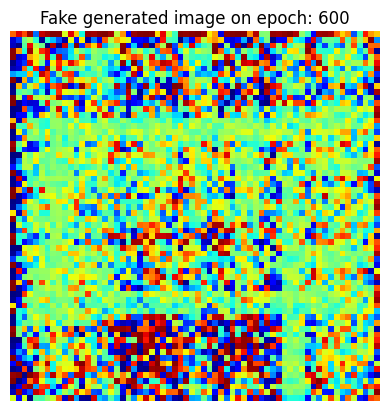


 time: 108.19 | epoch:   600/1500 | d_loss: 0.001 | g_loss: 7.683 | d_real: 100.00% | d_fake: 0.00% 



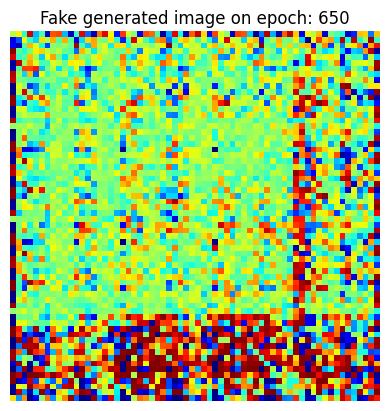


 time: 117.17 | epoch:   650/1500 | d_loss: 0.001 | g_loss: 8.053 | d_real: 100.00% | d_fake: 0.00% 



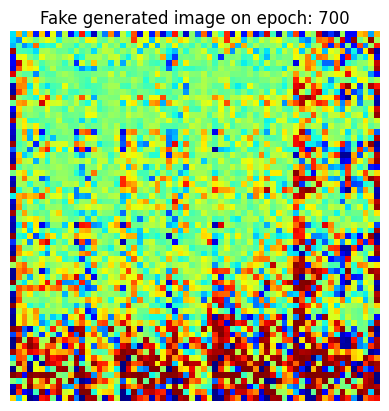


 time: 126.15 | epoch:   700/1500 | d_loss: 0.001 | g_loss: 7.866 | d_real: 100.00% | d_fake: 0.00% 



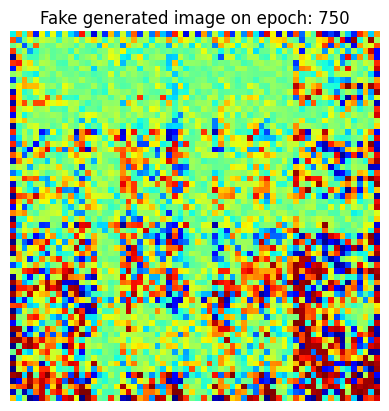


 time: 135.14 | epoch:   750/1500 | d_loss: 0.000 | g_loss: 7.974 | d_real: 100.00% | d_fake: 0.00% 



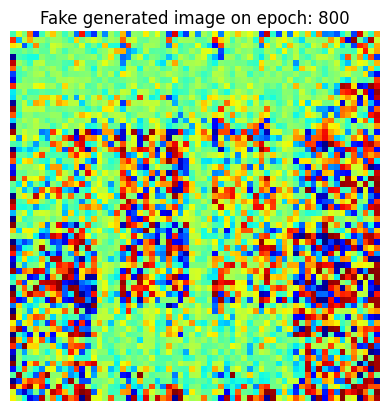


 time: 144.17 | epoch:   800/1500 | d_loss: 0.000 | g_loss: 8.010 | d_real: 100.00% | d_fake: 0.00% 



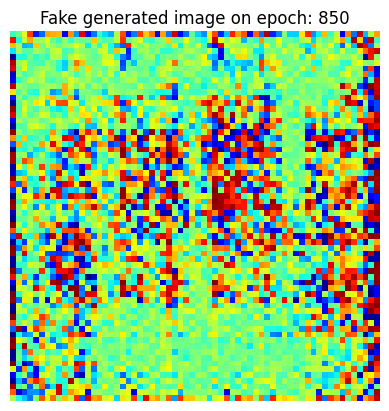


 time: 153.40 | epoch:   850/1500 | d_loss: 0.000 | g_loss: 8.132 | d_real: 100.00% | d_fake: 0.00% 



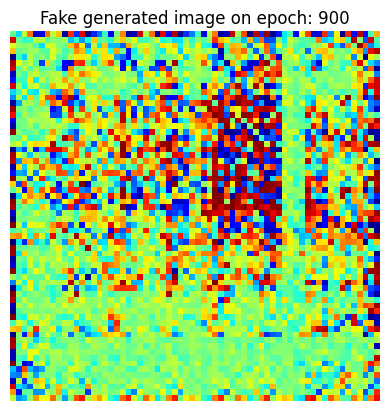


 time: 162.32 | epoch:   900/1500 | d_loss: 0.000 | g_loss: 8.009 | d_real: 100.00% | d_fake: 0.00% 



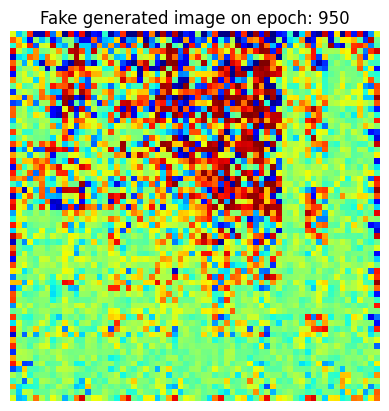


 time: 171.23 | epoch:   950/1500 | d_loss: 0.000 | g_loss: 8.577 | d_real: 100.00% | d_fake: 0.00% 



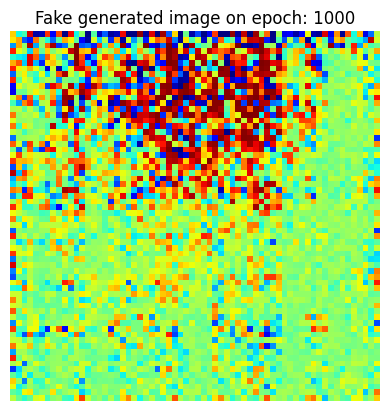


 time: 180.19 | epoch:  1000/1500 | d_loss: 0.000 | g_loss: 8.158 | d_real: 100.00% | d_fake: 0.00% 



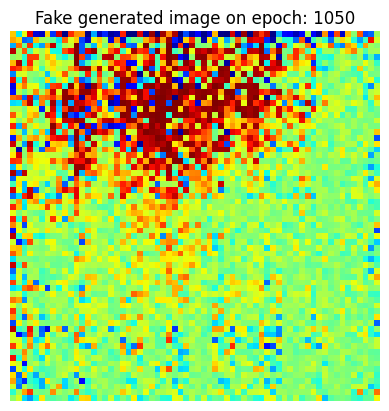


 time: 189.12 | epoch:  1050/1500 | d_loss: 0.000 | g_loss: 8.592 | d_real: 100.00% | d_fake: 0.00% 



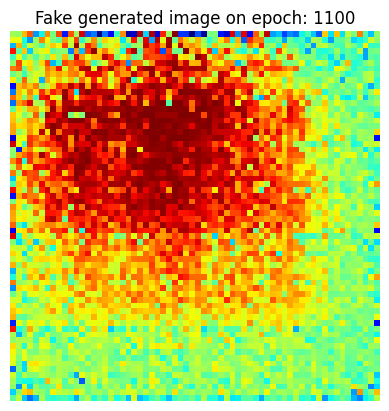


 time: 198.05 | epoch:  1100/1500 | d_loss: 0.215 | g_loss: 3.871 | d_real: 91.86% | d_fake: 0.00% 



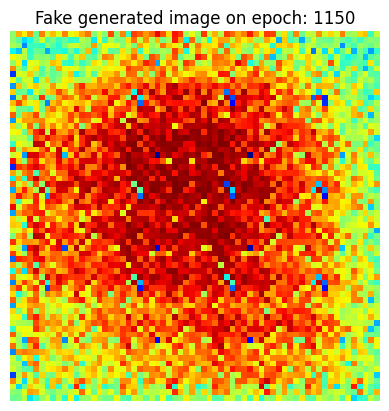


 time: 207.03 | epoch:  1150/1500 | d_loss: 0.511 | g_loss: 3.453 | d_real: 74.42% | d_fake: 16.28% 



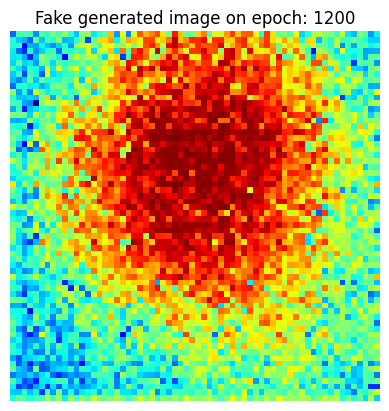


 time: 215.97 | epoch:  1200/1500 | d_loss: 0.332 | g_loss: 2.691 | d_real: 98.84% | d_fake: 0.00% 



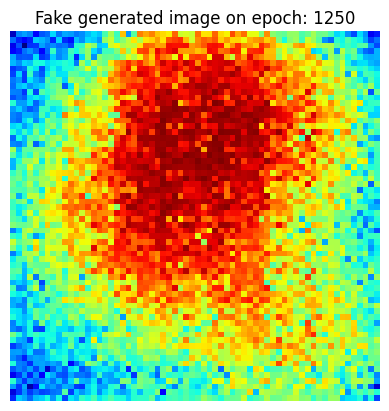


 time: 224.94 | epoch:  1250/1500 | d_loss: 1.347 | g_loss: 1.281 | d_real: 16.28% | d_fake: 4.65% 



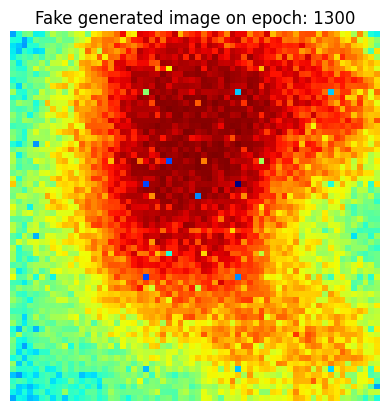


 time: 233.89 | epoch:  1300/1500 | d_loss: 0.898 | g_loss: 1.280 | d_real: 38.37% | d_fake: 1.16% 



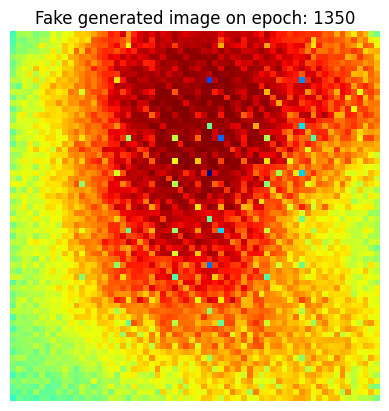


 time: 243.03 | epoch:  1350/1500 | d_loss: 1.110 | g_loss: 1.378 | d_real: 95.35% | d_fake: 15.12% 



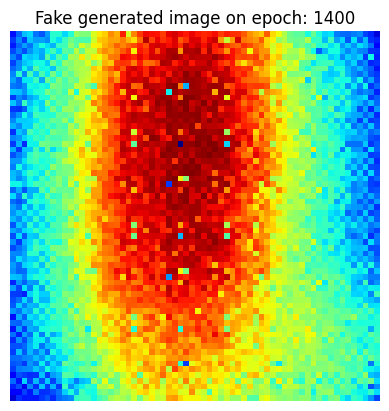


 time: 251.97 | epoch:  1400/1500 | d_loss: 0.680 | g_loss: 4.211 | d_real: 100.00% | d_fake: 0.00% 



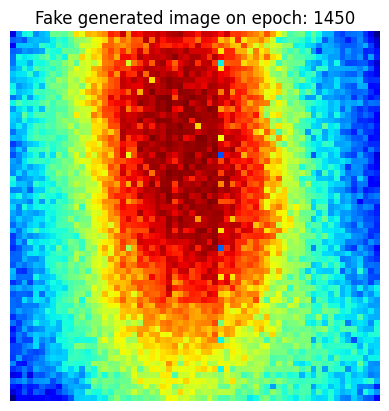


 time: 260.91 | epoch:  1450/1500 | d_loss: 0.618 | g_loss: 1.614 | d_real: 68.60% | d_fake: 0.00% 



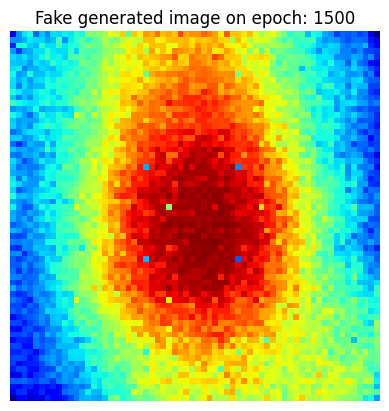


 time: 269.85 | epoch:  1500/1500 | d_loss: 0.751 | g_loss: 1.068 | d_real: 75.58% | d_fake: 4.65% 



In [ ]:
#%% TRAINING
criterion = nn.BCEWithLogitsLoss()


d_optimizer = optim.Adam(dnet.parameters(), lr=LR, betas=(0.5, 0.999))
g_optimizer = optim.Adam(gnet.parameters(), lr=LR, betas=(0.5, 0.999))

dnet = dnet.to(DEVICE)
gnet = gnet.to(DEVICE)

losses = []
dis_decs = []

fixed_random_tensor = torch.randn(1, 100, 1, 1).to(DEVICE)

start_time = time.time()
for epoch in range(NUM_EPOCHS):

    r_idx = torch.randint(images.shape[0], (BATCH_SIZE,))
    data = images[r_idx, :]
    data = data.to(DEVICE)

    data_len = data.shape[0]

    # feed real labels
    real_labels = torch.ones(BATCH_SIZE, 1).to(DEVICE)
    fake_labels = torch.zeros(BATCH_SIZE, 1).to(DEVICE)

    pred_real = dnet(data)
    d_loss_real = criterion(pred_real, real_labels)

    # feed fake labels
    fake_data = torch.randn(BATCH_SIZE, 100, 1, 1).to(DEVICE)
    fake_images = gnet(fake_data)
    pred_fake = dnet(fake_images)
    d_loss_fake = criterion(pred_fake, fake_labels)

    d_loss = d_loss_real + d_loss_fake

    # backprop
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    # create fake images
    fake_images = gnet(torch.randn(BATCH_SIZE, 100, 1, 1).to(DEVICE))
    pred_fake = dnet(fake_images)

    # loss
    g_loss = criterion(pred_fake, real_labels)

    # backprop
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    losses.append([d_loss.item(), g_loss.item()])
    d_real = torch.mean((pred_real > 0.5).float()).detach()
    d_fake = torch.mean((pred_fake > 0.5).float()).detach()
    dis_decs.append([d_real, d_fake])

    if (epoch+1) % 100 == 0:


        sample = gnet(fixed_random_tensor)
        plt.figure()
        plt.imshow(sample.cpu().detach().numpy().squeeze(), cmap='jet')
        plt.title(f"Fake generated image on epoch: {epoch+1}")
        plt.axis("off")
        plt.show()

        elapsed_time = time.time() - start_time
        msg = f"time: {elapsed_time:.2f} | epoch: {epoch+1:5}/{NUM_EPOCHS} |"\
              f" d_loss: {d_loss.item():.3f} | g_loss: {g_loss.item():.3f} |"\
              f" d_real: {100*d_real:.2f}% | d_fake: {100*d_fake:.2f}%"
        print("\n", msg, "\n")

losses = torch.tensor(losses).cpu().detach().numpy()
dis_decs = torch.tensor(dis_decs).cpu().detach().numpy()

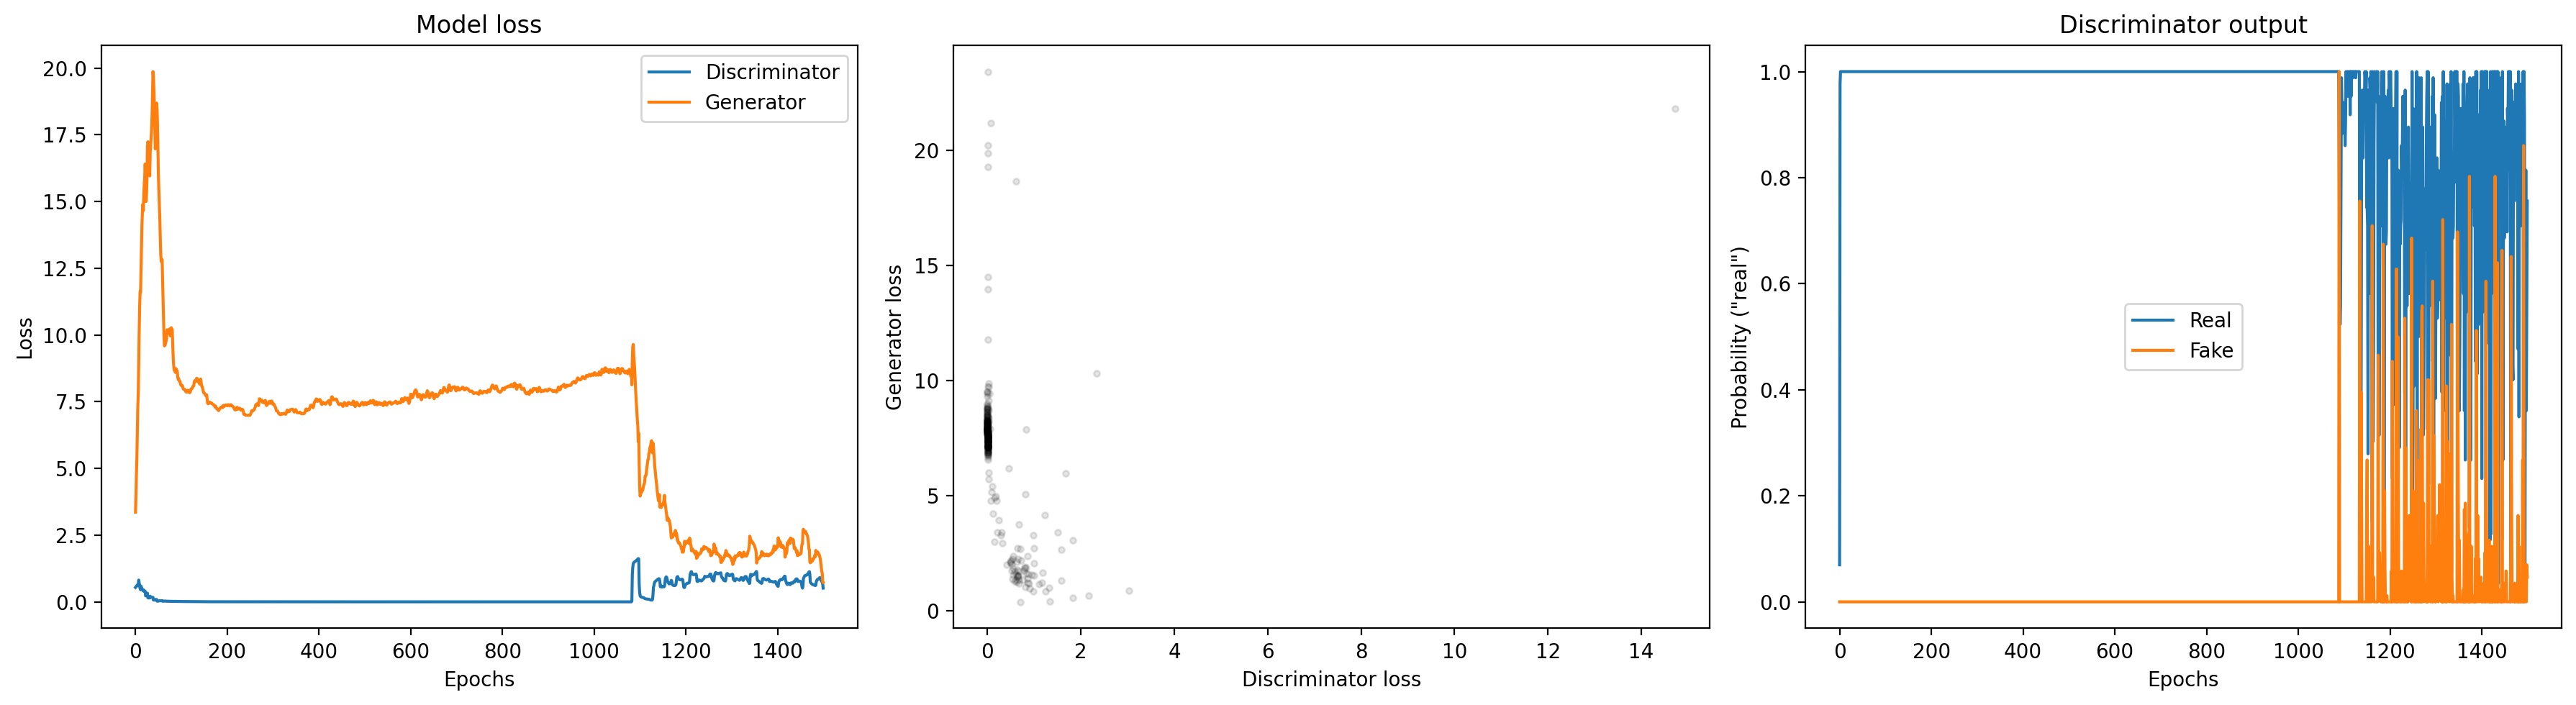

In [ ]:
#%% EVALUATE
def smooth(x, k=15):
    return np.convolve(x, np.ones(k) / k, mode='same')

fig, ax = plt.subplots(1, 3, figsize=(18, 5), dpi=200, tight_layout=True)
ax[0].plot(smooth(losses[:, 0]))
ax[0].plot(smooth(losses[:, 1]))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend(['Discriminator', 'Generator'])

ax[1].plot(losses[::5, 0], losses[::5, 1], 'k.', alpha=0.1)
ax[1].set_xlabel('Discriminator loss')
ax[1].set_ylabel('Generator loss')

ax[2].plot(dis_decs)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Probability ("real")')
ax[2].set_title('Discriminator output')
ax[2].legend(['Real', 'Fake'])
plt.show()

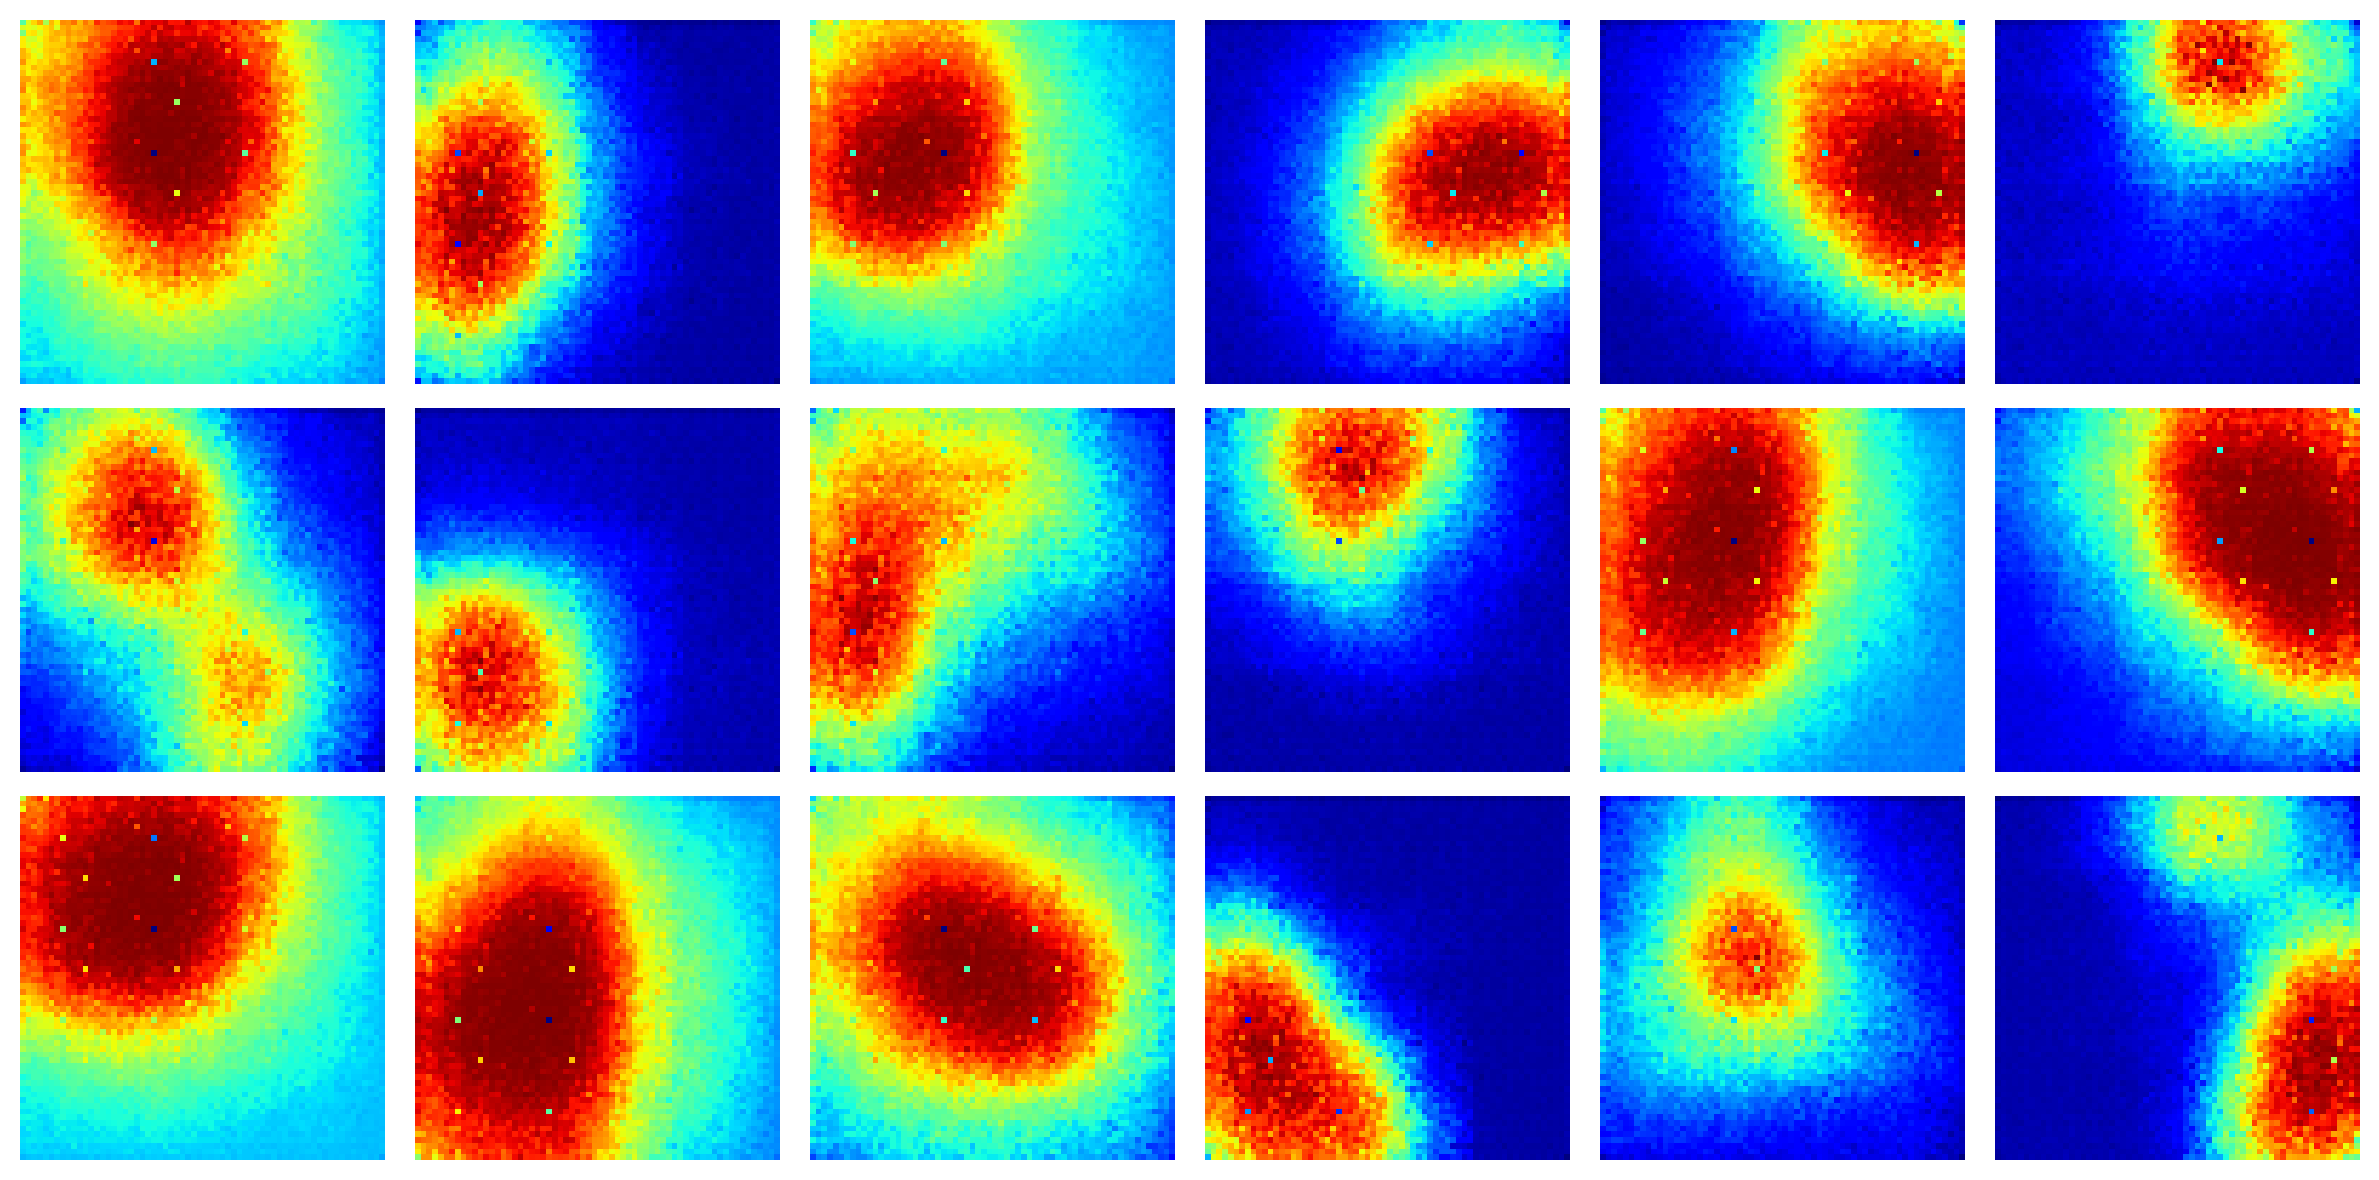

In [ ]:
gnet.eval()
with torch.inference_mode():
    fake_data = gnet(torch.randn(BATCH_SIZE, 100, 1, 1).to(DEVICE)).cpu()

fig, axs = plt.subplots(3, 6, figsize=(12, 6), dpi=200, tight_layout=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(fake_data[i,:,].detach().squeeze(), cmap='jet')
    ax.axis('off')
plt.show()